<a href="https://colab.research.google.com/github/eunseochu/OB_13th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%9C%84%EC%84%B1%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 합성곱 신경망(CNN)**

### **4) 위성 이미지 분류**

#### **4-1) 텐서플로 데이터셋 로드**
인공위성에서 지표면을 촬영한 이미지와 토지이용분류 값이 정리되어 있는 EuroSAT 데이터셋을 제공
- EU의 코페르니쿠스 지구 관측 프로그램에 의해 제공되는 공용 데이터셋인 Sentinel-2 위성이 관측한 이미지 기반
- 총 27,000장의 이ㅜ성 사진과 10개의 토지이용 분류 값이 매칭되어 제공

**EuroSAT 위성사진 데이터셋 로드** <br/>
tensorflow_datasets 라이브러리를 다른 필수 라이브러리와 함께 불러온다

In [2]:
import tensorflow as tf
import numpy as np
import json
import matplotlib.pylab as plt

# Tensorflow Datasets 활용
import tensorflow_datasets as tfds

In [3]:
DATA_DIR = "dataset/"   

(train_ds, valid_ds), info = tfds.load('eurosat/rgb', split=['train[:80%]', 'train[80%:]'],
                                        shuffle_files=True, 
                                        as_supervised=True,
                                        with_info=True,
                                        data_dir=DATA_DIR)
print(train_ds)
print(valid_ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling dataset/eurosat/rgb/2.0.0.incompleteP11OML/eurosat-train.tfrecord*...:   0%|          | 0/27000 [00:…

Dataset eurosat downloaded and prepared to dataset/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


- EuroSAT 데이터셋을 load 함수를 사용해서 불러온다
  - '(훈련 셋, 검증 셋), 메타 정보' 순으로 정리되어 반환
  - info 변수에 저장되는 메타 정보는 with_info = True 옵션일 때만 불러올 수 있다
  - 이 옵션이 False면 메타 정보 없이 (훈련 셋, 검증 셋) 형태의 튜플로 반환
- URL을 통해 데이터를 다운로드
  - data_dir 옵션에 파일 저장 위치를 지정하면 다운로드한 데이터셋 파일을 해당 위치에 저장 (dataset 폴더)
  - train 데이터만 제공하기 때문에 80:20으로 구분해 80%는 훈련셋, 나머지 20% 데이터는 검증셋으로 분할하여 저장
  - 이미지는 (64, 64, 3) 형태로 확인

**메타 데이터 확인** <br/>
데이터셋에 대한 기본 정보 확인
- EuroSAT 데이터셋의 2가지 유형 중에서 JPEG 이미지로 인코딩한 RGB 데이터셋을 다운로드한 상태

In [4]:
print(info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_path=PosixGPath('/tmp/tmpau0gz_rstfds'),
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('im

**데이터 확인** <br/>
샘플 이미지를 메타 정보인 분류 레이블과 함께 화면에 출력
- show_examples 함수를 이용

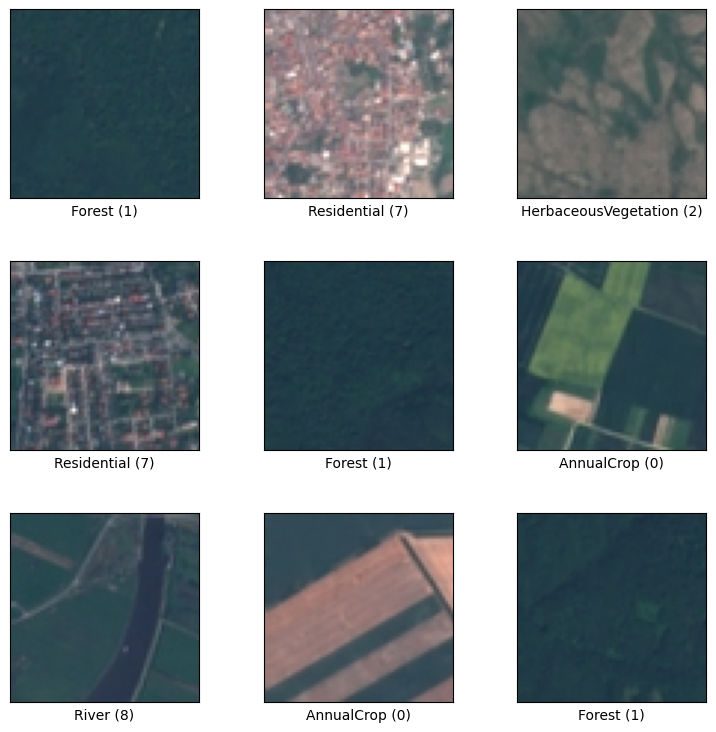

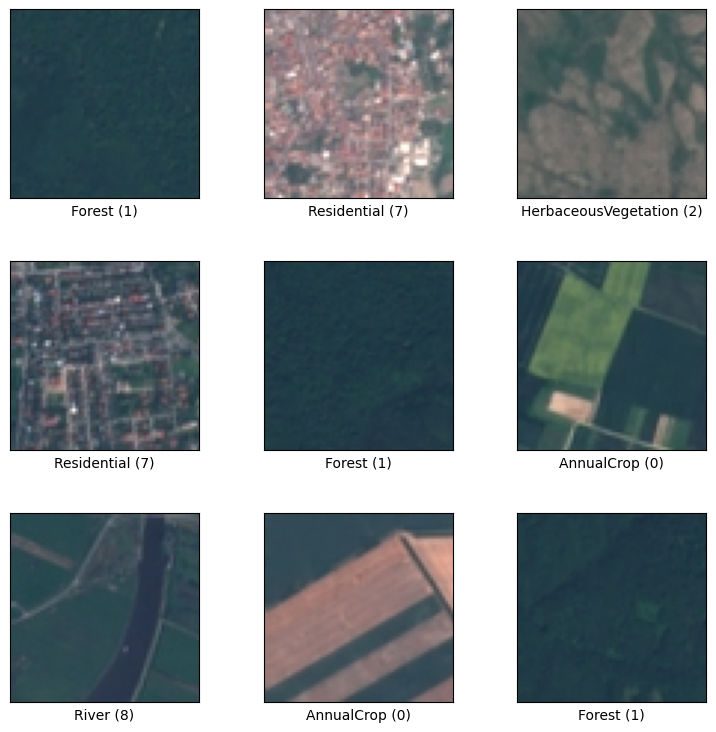

In [5]:
tfds.show_examples(train_ds, info)

**샘플 출력** <Br/>
샘플 이미지 10개를 화면에 표시
- as_dataframe 함수를 이용

,image,label
0,,5 (Pasture)
1,,7 (Residential)
2,,0 (AnnualCrop)
3,,1 (Forest)
4,,0 (AnnualCrop)
5,,2 (HerbaceousVegetation)
6,,9 (SeaLake)
7,,8 (River)
8,,2 (HerbaceousVegetation)
9,,9 (SeaLake)

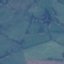
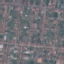
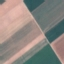
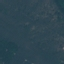
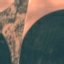
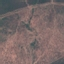
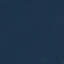
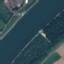
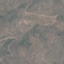
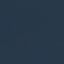

In [6]:
tfds.as_dataframe(valid_ds.take(10), info)

**목표 클래스의 개수** <br/>
토지 이용 분류에 해당하는 정답 클래스 개수는 10개
- 클래스 0은 경작지, 클래스 9는 바다/호수

In [7]:
NUM_CLASSES = info.features["label"].num_classes
print(NUM_CLASSES)

10


**숫자 레이블을 활용해 문자열 메타 데이터로 변환** <br/>
클래스를 나타내는 숫자 레이블을 메타 데이터의 문자열로 변환할 수 있음
- 메타 데이터의 features 값 중에서 label에 해당하는 메타 정보에 int2str() 메소드 적용
- 클래스 6은 영구작물을 나타냄

In [8]:
print(info.features["label"].int2str(6))

PermanentCrop


#### **4-2) 데이터 전처리**
텐서플로 데이터셋을 사용하면 딥러닝 학습에 필요한 데이터셋을 쉽게 구할 수 있으며, 데이터 전처리 과정이 매우 쉬움
- 데이터 전처리에 필요한 함수들을 제공하며, 텐서 연산을 효율적으로 처리할 수 있는 최적화 지원

**데이터 전처리 파이프라인**

In [9]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.   # 0~1 정규화, float32 변환
    return image, label

train_data = train_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)
valid_data = valid_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_data = valid_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE) 

- 텐서플로 연산은 float32 숫자 값을 사용하기 때문에, cast 함수를 사용하여 자료형을 float32로 변환
  - 입력 이미지는 0~255 범위의 픽셀 값을 갖기 때문에, 255로 나눠서 정규화
  - 이 과정을 처리하는 preprocess_data 함수 정의
- map 함수는 사용자 정의 함수를 매핑하여 텐서플로 데이터셋에 적용하는 메소드로 전처리 과정에서 매우 유용
  - num_parallel_calls 옵션을 오토튠으로 지정하면 텐서플로 벙렬연산 처리를 자동으로 최적화
  - 오토튠을 적용하지 않으면 데이터를 읽어서 매핑하고 훈련하는 과정을 순차적으로 처리하여 시간이 오래 걸림
  - 오토튠을 적용하면 하드웨어 리소스를 병렬로 매핑하여 처리하기 때문에 같은 작업을 짧은 시간 내 처리 가능
- 정규화 변환을 마친 데이터셋에 shuffle() 메소드를 적용하면 순서를 랜덤하게 섞어줌
  - 모델의 일반화된 성능을 높이기 위해 훈련 데이터셋에서 미니 배치를 생성할 때 입력 순서에 무작위성을 부여
  - BUFFER_SIZE를 100으로 지정하고 BATCH_SIZE를 64로 지정했는데, <br/> 처음 1,000개의 데이터를 가져와서 섞고 여기서 64개의 데이터를 랜덤하게 선택해서 하나의 배치를 구성
  - 64개가 추출되어 미니 배치 구성 및 학습에 사용되면, 다시 64개가 버퍼에 추가되어 항상 1,000개의 버퍼 구성
- prefetch() 메소드는 모델이 훈련을 진행하는 동안 다음에 입력할 데이터를 불러와서 미리 전처리를 하도록 조율
  - 병렬 처리를 통해 모델 훈련 시간을 단축

#### **4-3) 모델 훈련 및 검증**
배치 정규화, 합성곱, 풀링 레이어로 구성된 유닛을 2개 연결하고, <br/> Dense 레이어와 Dropout으로 구성된 최종 분류기를 갖는 딥러닝 모델을 Sequential API로 생성

**Sequential API를 사용하여 샘플 모델 생성**

In [10]:
def build_model():

    model = tf.keras.Sequential([

        # Convolution 층 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Classifier 출력층 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'), 
        tf.keras.layers.Dropout(0.3),  
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dropout(0.3),              
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
    ])

    return model

model = build_model()

**모델 컴파일 및 훈련** <Br/>
예측 클래스가 10개인 다중 분류 문제에 맞게 손실함수와 평가지표를 설정하고, 모델을 50 epoch 훈련

In [29]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 
history = model.fit(train_data, 
                    validation_data=valid_data, 
                    epochs=50)     

Epoch 1/5
338/338 [==============================] - 234s 685ms/step - loss: 0.4259 - accuracy: 0.8591 - val_loss: 0.4126 - val_accuracy: 0.8678
Epoch 2/5
338/338 [==============================] - 208s 615ms/step - loss: 0.3815 - accuracy: 0.8752 - val_loss: 0.3803 - val_accuracy: 0.8757
Epoch 3/5
 19/338 [>.............................] - ETA: 3:16 - loss: 0.3065 - accuracy: 0.8980

KeyboardInterrupt: ignored

**손실함수, 정확도 그래프 그리기** <Br/>
모델은 10 epoch까지는 빠른 속도로 훈련이 진행되면서 손실함수가 급격하게 감소
- 그 이후로는 검증 셋에 대한 손실함수가 더 이상 줄어들지 않으면서 과대적합 경향을 보임

In [12]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 50) 

NameError: ignored

#### **4-4) 데이터 증강 (Data Augmentation)**
이미지 분류 문제에서 과대적합을 해소하고, 모델의 일반화된 Robust한 성능을 확보하는 기법
- 이미지 데이터에 여러가지 변형을 주어서 훈련 데이터의 다양성을 확보하는 방식
- 모델이 새로운 데이터에 대한 예측력을 강화하도록 하는 개념

**샘플 이미지** <br/>
EuroSAT 데이터셋 중 샘플 이미지 하나를 선택해 시각화

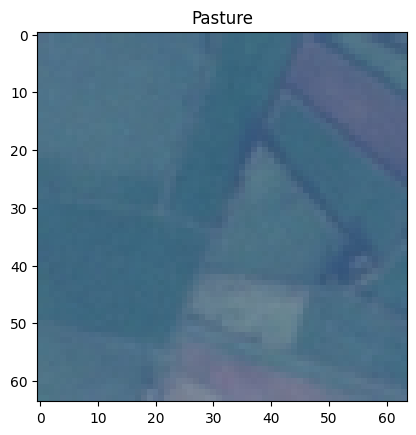

In [13]:
image_batch, label_batch = next(iter(train_data.take(1)))

image = image_batch[0]
label = label_batch[0].numpy()

plt.imshow(image)
plt.title(info.features["label"].int2str(label));

**데이터 증강 전후를 비교하는 시각화 함수** <br/>
샘플 이미지에 변화를 주기 전과 후를 비교할 수 있는 시각화 함수 정의

In [14]:
def plot_augmentation(original, augmented):

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].imshow(original)
    axes[0].set_title('Original')

    axes[1].imshow(augmented)
    axes[1].set_title('Augmented')

    plt.show()

**좌우 뒤집기** <br/>
tf.image 모듈의 flip_left_right 함수를 사용하여 이미지를 좌우 방향으로 뒤집는 방법

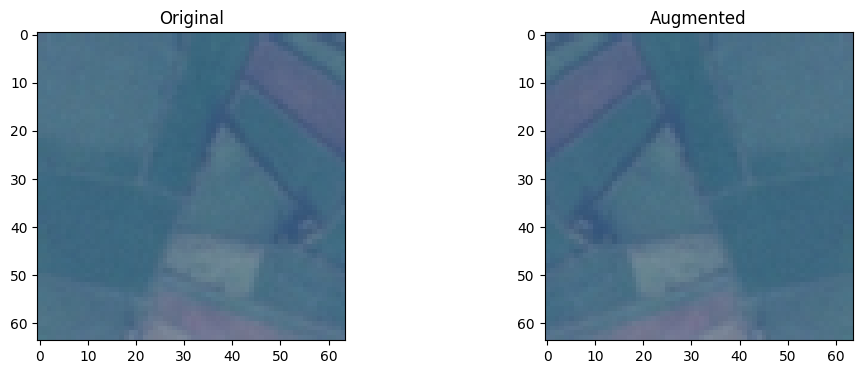

In [15]:
lr_flip = tf.image.flip_left_right(image)
plot_augmentation(image, lr_flip)

**상하 뒤집기** <br/>
flip_up_down 함수를 사용하여 이미지를 상하 방향으로 뒤집는 방법

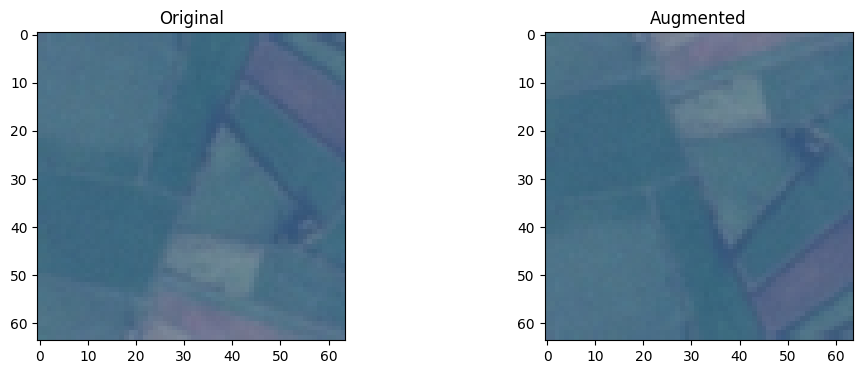

In [16]:
ud_flip = tf.image.flip_up_down(image)
plot_augmentation(image, ud_flip)

**회전** <br/>
rot90 함수를 사용해 이미지를 반시계 방향으로 90도 회전

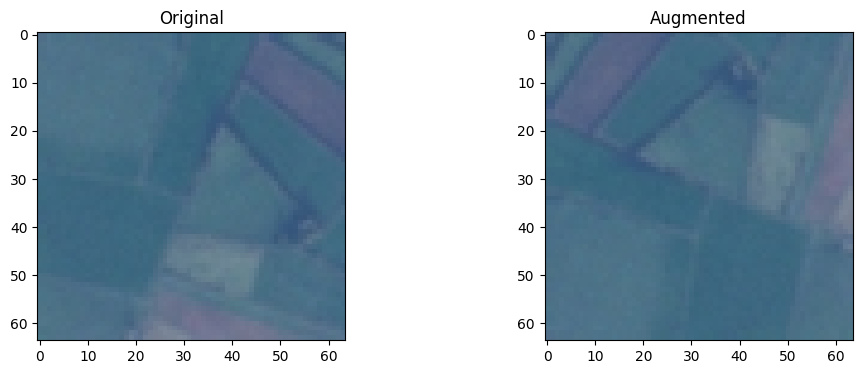

In [17]:
rotate90 = tf.image.rot90(image)
plot_augmentation(image, rotate90)

**transpose** <br/>
이미지의 텐서 행렬의 행과 열의 위치를 바꿔 줌 (행렬의 도치)

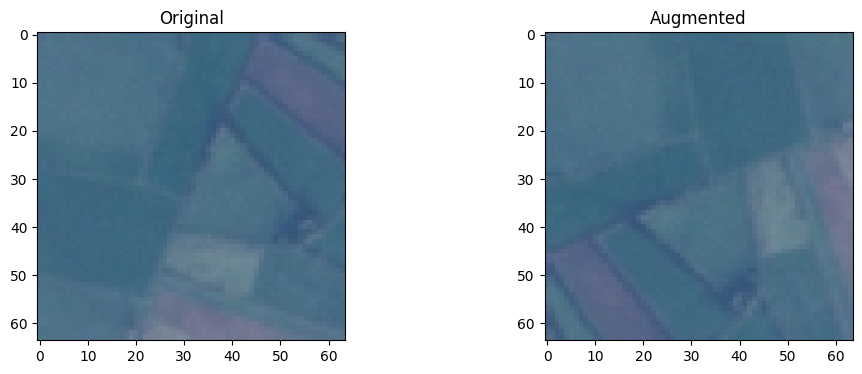

In [18]:
transpose = tf.image.transpose(image)
plot_augmentation(image, transpose)

**이미지 자르기 (1)** <br/>
coentral_crop 함수를 사용해 이미지의 중심에서 일정 부분을 잘라내는 방법 구현

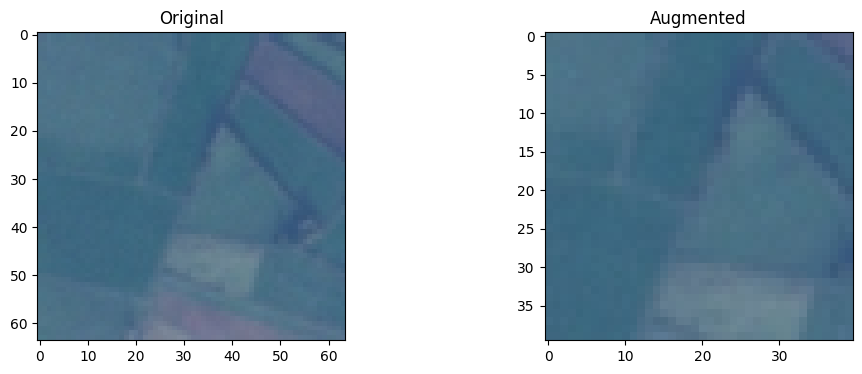

In [19]:
crop1 = tf.image.central_crop(image, central_fraction=0.6)
plot_augmentation(image, crop1)

**이미지 자르기(2)** <br/>
원본 이미지가 상하좌우 랜덤한 방향으로 shift 이동하는 방법
- 먼저, resize_with_crop_pad 함수를 사용해 원본 이미지를 키움
- 여기에 random_crop 함수를 사용하고 이미지를 원본 크기와 같게 자름

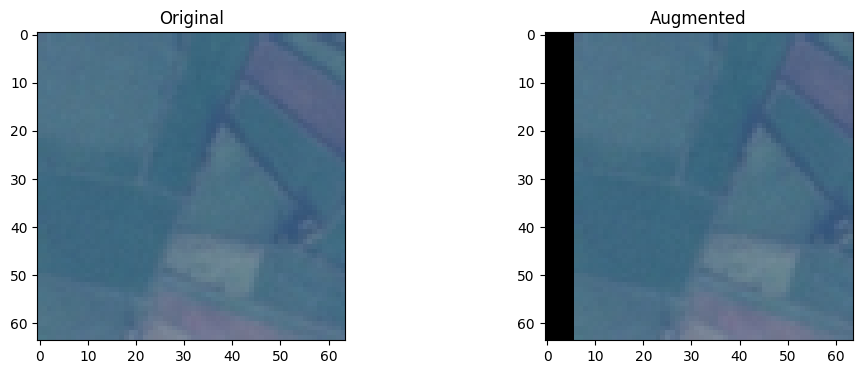

In [20]:
img = tf.image.resize_with_crop_or_pad(image, 64 + 20, 64 + 20) # 사이즈 키우기
crop2 = tf.image.random_crop(img, size=[64, 64, 3])
plot_augmentation(image, crop2)

**이미지 밝기 조정**

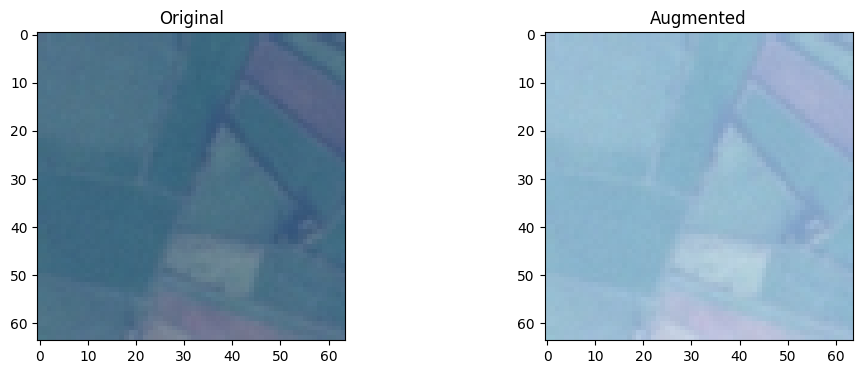

In [21]:
brightness = tf.image.adjust_brightness(image, delta=0.3)
plot_augmentation(image, brightness)

**이미지 채도 변경**

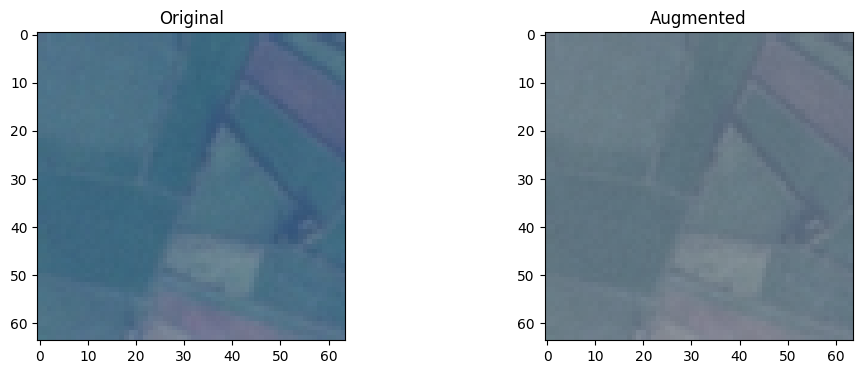

In [22]:
saturation = tf.image.adjust_saturation(image, saturation_factor=0.5)
plot_augmentation(image, saturation)

**이미지 대비(contrast) 조정**

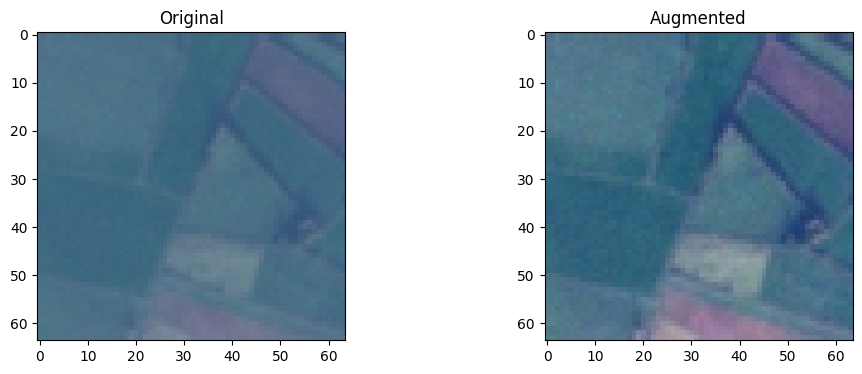

In [23]:
contrast = tf.image.adjust_contrast(image, contrast_factor=2)
plot_augmentation(image, contrast)

**이미지 증강 전처리** <Br/>
앞서 다룬 여러 기법 중 몇 가지를 선택하여 데이터 증강 및 전처리를 수행하는 data_augmentation 사용자 함수 정의
- 이미지 효과에 랜덤성을 부여하기 위해 tf.image 모듈에서 지원하는 함수 중에서 'random_'으로 시작하는 함수 적용
- map 함수로 원본 데이터셋에 적용하고, shuffle 함수와 batch 함수 등을 적용하여 미니 배치로 만들어 줌

In [24]:
def data_augmentation(image, label):

    image = tf.image.random_flip_left_right(image) # 좌우 반전
    image = tf.image.random_flip_up_down(image) # 상하 반전    
    image = tf.image.random_brightness(image, max_delta=0.3) # 밝기 변화 
    image = tf.image.random_crop(image, size=[64, 64, 3])

    image = tf.cast(image, tf.float32) / 255.   # 0~1 정규화

    return image, label

train_aug = train_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
valid_aug = valid_ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

train_aug = train_aug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_aug = valid_aug.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE) 

print(train_aug)
print(valid_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


**모델 생성, 컴파일 및 훈련** <br/>
모델 인스턴스를 생성하고 컴파일을 거쳐 50 epoch 동안 훈련
- 데이터 증강을 하기 전과 모델 성능 자체는 큰 차이가 없음

In [25]:
# 모델 생성
aug_model = build_model()

# 모델 컴파일
aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 
aug_history = aug_model.fit(train_aug, 
                            validation_data=valid_aug, 
                            epochs=50)  

Epoch 1/50
 18/338 [>.............................] - ETA: 3:19 - loss: 2.9446 - accuracy: 0.1623

KeyboardInterrupt: ignored

**손실 함수, 정확도 그래프 그리기** <br/>
훈련 셋과 검증 셋에 대한 손실함수는 50 epoch 동안 계속 줄어들고 정확도는 조금씩 우상향하면서 개선
- 과대적합 문제가 상당히 해소됨
- 훈련 셋에 대한 손실함수보다 검증 셋에 대한 손실함수가 여전히 낮으므로, <br/> epoch 수를 늘려서 모델을 훈련시키면 성능을 개선시킬 여지가 존재

In [ ]:
plot_loss_acc(aug_history, 50)

#### **4-5) ResNet 사전 학습 모델**
이미지넷 경진대회에서 우승한 모델로 우수한 성능을 보이는 ResNet 모델을 활용하여 위성 이미지를 분류
- 사전에 방대한 이미지로 훈련을 받은 딥러닝 모델의 구조와 가중치를 그대로 가져오고, <br/> 모델의 끝단에 위치하는 Top 층에 위성 이미지를 분류할 수 있는 최종 분류기를 추가하는 방식으로 모델 구성
- 이런 방식으로 딥러닝 모델을 구성하는 것을 전이 학습이라고 부름

**전이 학습** <br/>
케라스에서 모델 인스턴스를 직접 불러올 수 있으며, ResNet50V2 버전을 사용
- 우리가 사용하는 위성 이미지의 크기가 (64, 64, 3)이므로 input_shape 속성에 지정
  - 원래 ResNet 모델의 입력 크기는 (224, 224, 3)이지만, 케라스에서 이미지 크기를 지정한 크기로 맞춰서 줄여줌
  - 분류하려는 클래스 레이블의 개수(10)를 classes 속성에 지정
- 가장 중요한 옵션은 include_top = False로 지정하는 것
  - 이미지넷 경진 대회에 맞는 분류기이므로 False로 지정하여 Top 층 제거
  - 제거 된 부분에 우리가 해결하려는 문제에 맞는 최종 분류기를 대체해서 추가
- Top 층을 제거한 ResNet 모델의 trainable 속성을 False로 지정
  - True로 지정하면 사전 학습된 가중치까지 훈련 과정에서 업데이트

In [ ]:
# Pre-trained 모델을 사전 학습된 가중치와 함께 가져오기
from tensorflow.keras.applications import ResNet50V2

pre_trained_base = ResNet50V2(include_top=False, 
                               weights='imagenet',
                               input_shape=[64, 64, 3])
, 
# 사전 학습된 가중치를 업데이트 되지 않도록 설정
pre_trained_base.trainable = False

# 모델 구조 시각화
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(pre_trained_base, show_shapes=True, show_layer_names=True, to_file='resnet50.png')

**모델 생성**
- NUM_CLASSES 변수는 위성 이미지의 클래스 레이블 개수인 10을 값으로 가지고 있음
- 최종적으로 10개 클래스에 대한 다중 분류를 할 수 있도록 Dense 레이어의 노드 개수와 softmax 활성화 함수를 지정

In [ ]:
# Top 층에 Classifier 추가

def build_trainsfer_classifier():

    model = tf.keras.Sequential([

        # Pre-trained Base 
        pre_trained_base,
        # Classifier 출력층 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'), 
        tf.keras.layers.Dropout(0.3),  
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dropout(0.3),              
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
    ])

    return model

# 모델 구조
tc_model = build_trainsfer_classifier()    
tc_model.summary()